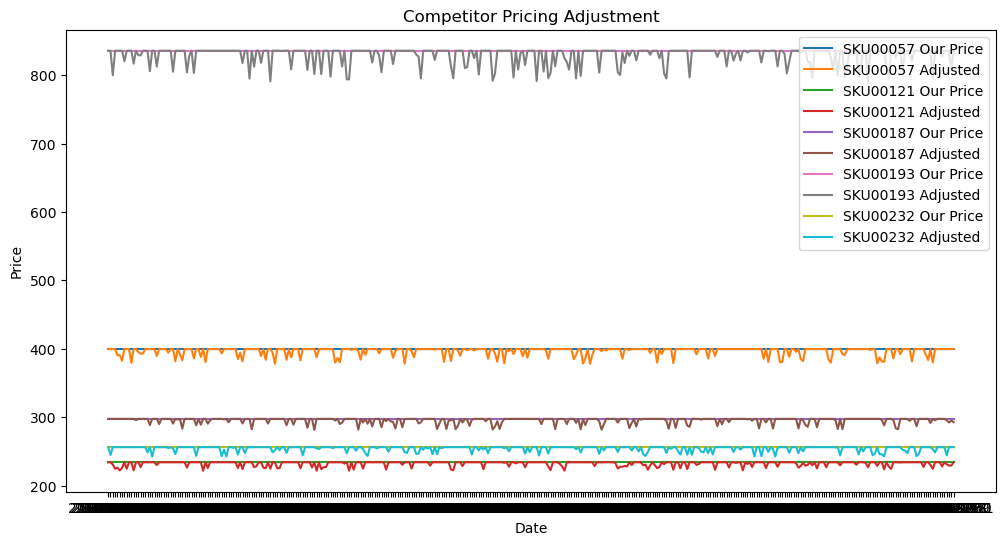

In [2]:
# 04_competitor_pricing.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR = "../data"

prices = pd.read_csv(f"{DATA_DIR}/prices_advanced.csv")
competitor = pd.read_csv(f"{DATA_DIR}/competitor_prices.csv")

# Merge competitor prices
df = prices.merge(competitor, on=['sku_id','date'], how='left')
df['adjusted_price'] = df['our_new_price']

# Adjust if higher than competitor + 5%
df.loc[df['our_new_price'] > df['competitor_price_y']*1.05, 'adjusted_price'] = df['competitor_price_y']*1.05

# Plot comparison for first 5 SKUs
sample = df[df['sku_id'].isin(df['sku_id'].unique()[:5])]
plt.figure(figsize=(12,6))
for sku in sample['sku_id'].unique():
    sku_data = sample[sample['sku_id']==sku]
    plt.plot(sku_data['date'], sku_data['our_new_price'], label=f'{sku} Our Price')
    plt.plot(sku_data['date'], sku_data['adjusted_price'], label=f'{sku} Adjusted')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Competitor Pricing Adjustment")
plt.legend()
plt.show()
